In [2]:
import tensorflow as tf
tf.__version__

'2.17.0'

In [32]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [33]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [37]:
class Model:

    def __init__(self):
        self.layers = []
        self.history = None
        self.add_input_layer()
        self.add_hidden_layer()
        self.add_output_layer()
        self.model = Sequential(
            self.layers,
            name="handwritten_numbers"
        )
        self.compile()
        self.model.summary()

    def add_input_layer(self):
        input_shape = (28, 28, 1)
        input_layers = [
            Input(shape=input_shape, name="input"),
        ]
        for layer in input_layers:
            self.layers.append(layer)

    def add_hidden_layer(self):
        hidden_layers = [
            Conv2D(32, kernel_size=(3, 3), activation="relu", name='conv2D'),
            MaxPooling2D((2, 2), name='max_pooling'),
            Flatten(name='flatten'),
            Dense(128, activation='relu', name='dense'),
            Dropout(0.5, name='dropout'),
        ]
        for layer in hidden_layers:
            self.layers.append(layer)

    def add_output_layer(self):
        output_layers = [
            Dense(10, activation="softmax", name="output"),
        ]
        for layer in output_layers:
            self.layers.append(layer)

    def compile(self):
        optimizer = 'adam'
        loss = 'sparse_categorical_crossentropy'
        metrics = ['sparse_categorical_accuracy']
        self.model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    def add_callbacks(self):
        callbacks = []
        callbacks.append(EarlyStopping(monitor='val_loss', patience=3))
        callbacks.append(ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True))
        callbacks.append(ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1))
        return callbacks

    def fit(self, X_train, y_train, validation_data, epochs=10):
        batch_size = 32
        self.history = self.model.fit(
            X_train,
            y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=validation_data,
            callbacks=self.add_callbacks()
        )

    def evaluate(self, X_test, y_test):
        print(self.model.evaluate(X_test, y_test))

        import matplotlib.pyplot as plt

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
        ax1.plot(self.history.history['loss'], label='Train Loss')
        ax1.plot(self.history.history['val_loss'], label='Validation Loss')
        ax1.set_title('Model Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.legend()
        ax2.plot(self.history.history['sparse_categorical_accuracy'], label='Train Accuracy')
        ax2.plot(self.history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
        ax2.set_title('Model Accuracy')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        plt.tight_layout()
        plt.show()


model = Model()

Model: "handwritten_numbers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2D (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling (MaxPooling2D)           │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - loss: 0.4245 - sparse_categorical_accuracy: 0.8683 - val_loss: 0.0671 - val_sparse_categorical_accuracy: 0.9784 - learning_rate: 0.0010
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 21ms/step - loss: 0.1057 - sparse_categorical_accuracy: 0.9677 - val_loss: 0.0585 - val_sparse_categorical_accuracy: 0.9801 - learning_rate: 0.0010
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - loss: 0.0749 - sparse_categorical_accuracy: 0.9766 - val_loss: 0.0496 - val_sparse_categorical_accuracy: 0.9836 - learning_rate: 0.0010
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - loss: 0.0612 - sparse_categorical_accuracy: 0.9813 - val_loss: 0.0400 - val_sparse_categorical_accuracy: 0.9864 - learning_rate: 0.0010
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - loss: 0.0509 - sparse_categorical_accuracy: 0.9835 - val_loss: 0.0364 - val_sparse_categorical_accuracy: 0.9878 - learning_rate: 0.0010
Epoch 6/10
1875/1875 ━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0424 - sparse_categorical_accuracy: 0.9872
[0.03422894328832626, 0.9900000095367432]


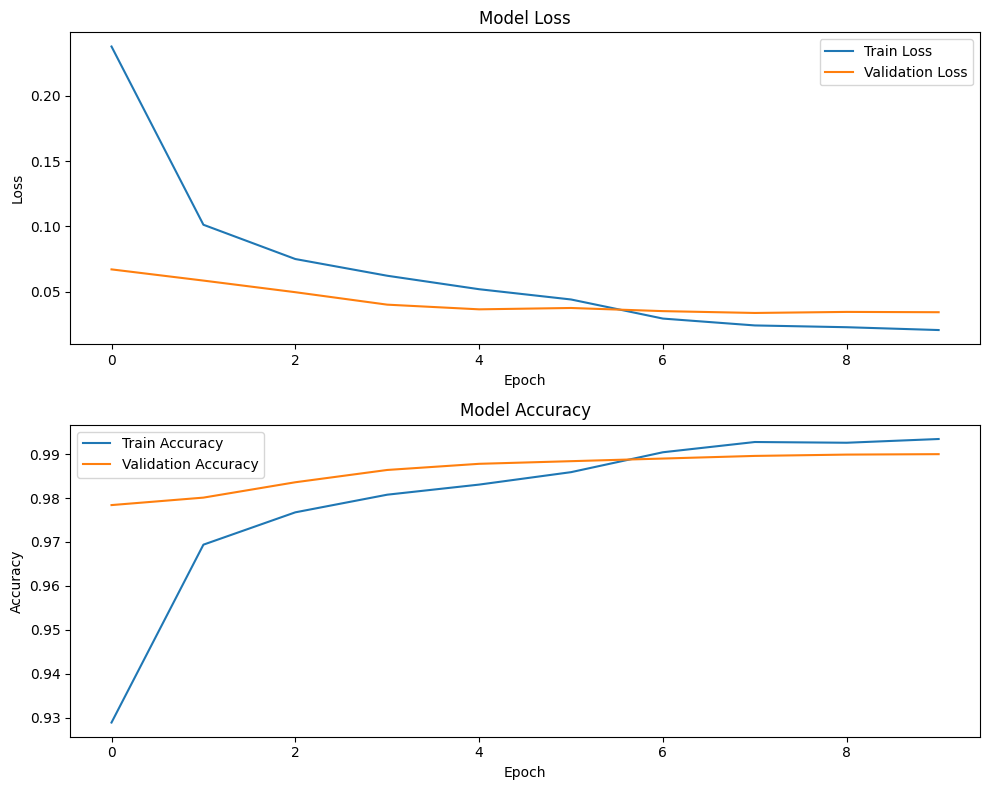

In [39]:
model.evaluate(X_test, y_test)